In [6]:
%load_ext autoreload
%autoreload 2
import cython
import wwz_edited
import plot_methods_edited
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import matplotlib.axes as axes
import matplotlib.colors as colors
from datetime import datetime
data_path = "../data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.5
largest tau window is  4.252
1080.62 seconds has passed to complete Weighted Wavelet Z-transform 



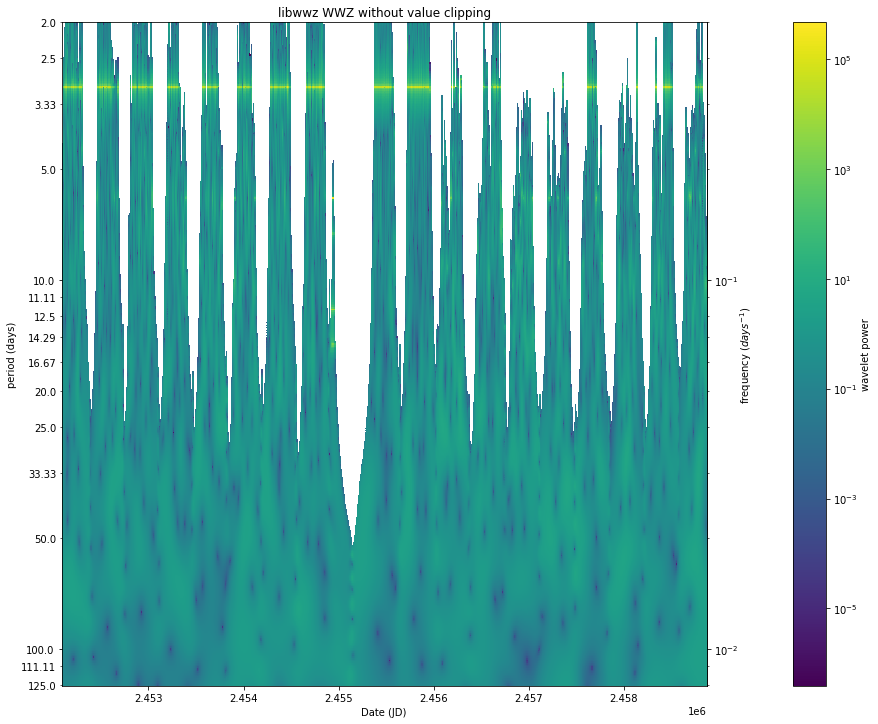

In [7]:
# generate data for a sine wave observed for 10 years with random noise added
data = np.loadtxt(data_path+"ogle_merged/sxp327.csv", delimiter=",", dtype=float)
x = data[:,0]
# x = np.linspace(0, 249, num=250)
period = 3
f=1/period
y = np.sin(x*f*np.pi*2)#+np.random.normal(0,0.5,size=len(x))

# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = len(x) #(x[-1]-x[0])/4 # no. linear divisions between first and last time stamps of the time series

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/125
frequency_high = 1/2
# frequency_steps = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=1000)
# frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=400)#[frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f

# f = 20     # we choose 4 since our signal of interest is at 4 h
# w = 2 * np.pi * f
# decay_constant = 1/(2*w**2)
decay_constant = 1/(8*np.pi**2)
# Finally, we select to wether to run with parallization (recommend True)
parallel = True


# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_spec_Nyq = wwz_edited.wwt(timestamps=x,
                     magnitudes=y,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant, parallel=True)

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])
plot_methods_edited.log_plotter(ax=ax,
                       TAU=wwt_spec_Nyq[0],
                       FREQ=wwt_spec_Nyq[1],
                       DATA=wwt_spec_Nyq[2],
                    clip=None)#(np.percentile(wwt_spec_Nyq[2], 75),np.percentile(wwt_spec_Nyq[2], 99.9)))
fig.tight_layout()
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
plt.title("libwwz WWZ without value clipping")
# plt.savefig('test_images/test_spectrogram_{}.png'.format(dt_string))
plt.show()

In [3]:
%load_ext autoreload
%autoreload 2

import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
# os.environ['MKL_NUM_THREADS'] = '1' # use this one on snuffy
#https://stackoverflow.com/questions/17053671/how-do-you-stop-numpy-from-multithreading


import cython
import wwz_cython
import plot_methods_edited
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import matplotlib.axes as axes
import matplotlib.colors as colors
from datetime import datetime
data_path = "../data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# generate data for a sine wave observed for 10 years with random noise added
data = np.loadtxt(data_path+"ogle_merged/sxp327.csv", delimiter=",", dtype=float)
x = data[:,0]
# x = np.linspace(0, 249, num=250)
period = 3
f=1/period
y = np.sin(x*f*np.pi*2)#+np.random.normal(0,0.5,size=len(x))

# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = len(x) #(x[-1]-x[0])/4 # no. linear divisions between first and last time stamps of the time series

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/125
frequency_high = 1/2
# frequency_steps = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=1000)
# frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=400)#[frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f

# f = 20     # we choose 4 since our signal of interest is at 4 h
# w = 2 * np.pi * f
# decay_constant = 1/(2*w**2)
decay_constant = 1/(8*np.pi**2)
# Finally, we select to wether to run with parallization (recommend True)
parallel = True


# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_p = wwz_cython.wwt(timestamps=x,
                     magnitudes=y,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant, parallel=False)

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])
plot_methods_edited.log_plotter(ax=ax,
                       TAU=wwt_p[0],
                       FREQ=wwt_p[1],
                       DATA=wwt_p[2],
                    clip=None)#(np.percentile(wwt_p[2], 75),np.percentile(wwt_p[2], 99.9)))
fig.tight_layout()
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
# plt.title("vectorized WWZ without value clipping")
# plt.savefig('test_images/test_spectrogram_{}.png'.format(dt_string))
plt.show()

*** Starting Weighted Wavelet Z-transform ***



ValueError: cannot reshape array of size 471642 into shape (1596,400)

In [ ]:
# generate data for a sine wave observed for 10 years with random noise added
data = np.loadtxt(data_path+"ogle_merged/sxp327.csv", delimiter=",", dtype=float)
x = data[:,0]
# x = np.linspace(0, 249, num=250)
period = 3
f=1/period
y = np.sin(x*f*np.pi*2)#+np.random.normal(0,0.5,size=len(x))

# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = len(x) #(x[-1]-x[0])/4 # no. linear divisions between first and last time stamps of the time series

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/125
frequency_high = 1/2
# frequency_steps = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=1000)
# frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=400)#[frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f

# f = 20     # we choose 4 since our signal of interest is at 4 h
# w = 2 * np.pi * f
# decay_constant = 1/(2*w**2)
decay_constant = 1/(8*np.pi**2)
# Finally, we select to wether to run with parallization (recommend True)
parallel = True


# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_spec_Nyq = wwz_edited.wwt(timestamps=x,
                     magnitudes=y,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant, parallel=True)

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])
plot_methods_edited.log_plotter(ax=ax,
                       TAU=wwt_spec_Nyq[0],
                       FREQ=wwt_spec_Nyq[1],
                       DATA=wwt_spec_Nyq[2],
                    clip=None)#(np.percentile(wwt_spec_Nyq[2], 75),np.percentile(wwt_spec_Nyq[2], 99.9)))
fig.tight_layout()
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
plt.title("libwwz WWZ without value clipping")
# plt.savefig('test_images/test_spectrogram_{}.png'.format(dt_string))
plt.show()

In [11]:
wwt_spec_Nyq[0][:,0]

NameError: name 'wwt_spec_Nyq' is not defined

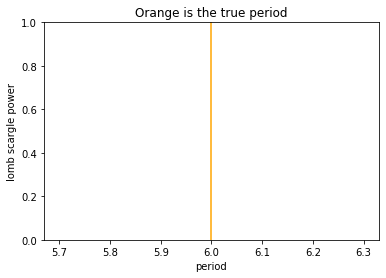

NameError: name 'linear_plotter_log_1' is not defined

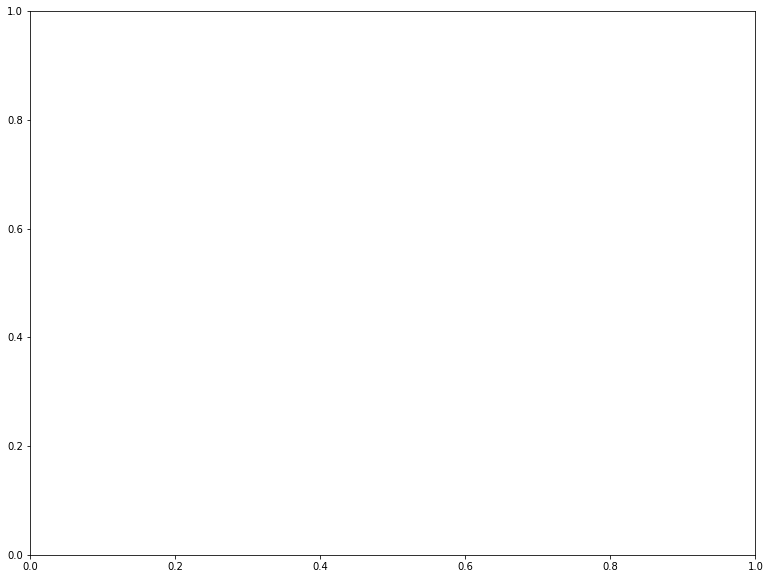

In [9]:
# generate data for a sine wave observed for 10 years with random noise added
# data = np.loadtxt(data_path+"ogle_merged/sxp327.csv", delimiter=",", dtype=float)
x = data[:,0]
x = np.linspace(0, 249, num=260)
period = 6
f=1/period
y = np.sin(x*f*np.pi*2)#+np.random.normal(0,0.5,size=len(x))

f = np.linspace(1/125, 1/2, 10000)*np.pi*2
# pgram = signal.lombscargle(x,y, f, normalize=True)
plt.axvline(x=period, c="orange", zorder=1)

# plt.plot(1/(f/(2.0*np.pi)), pgram, c="black", zorder=2)
plt.xlabel("period")
plt.ylabel("lomb scargle power")
plt.title("Orange is the true period")

plt.show()


# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 500 #(x[-1]-x[0])/4 # no. linear divisions between first and last time stamps of the time series

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/125
frequency_high = 1/2
# frequency_steps = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=1000)
# frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = np.logspace(np.log10(frequency_low), np.log10(frequency_high), num=400)#[frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f

# f = 20     # we choose 4 since our signal of interest is at 4 h
# w = 2 * np.pi * f
# decay_constant = 1/(2*w**2)
decay_constant = 1/(8*np.pi**2)
# Finally, we select to wether to run with parallization (recommend True)
parallel = True


# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
# wwt_spec = wwt_6 = wwt(timestamps=x,
#                      magnitudes=y,
#                      time_divisions=ntau,
#                      freq_params=frequency_parameters,
#                      decay_constant=decay_constant,
#                      method='linear',
#                      parallel=parallel)

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

linear_plotter_log_1(ax=ax,
                       TAU=wwt_spec[0],
                       FREQ=wwt_spec[1],
                       DATA=wwt_spec[3],
                    clip=(np.percentile(wwt_spec[3], 50),np.percentile(wwt_spec[3], 99.9)))
plt.locator_params(axis='y', nbins=100)
ax.set_ylabel('Frequency (1/day)')
plt.yscale("log")
# plt.axhline(y=1/period, zorder=1, c="black")


plt.tight_layout()
plt.show()

plt.plot(1/wwt_spec[1][0], np.sum(np.abs(wwt_spec[2])**2, axis=0), c="black", zorder=2)
plt.xlabel("period")
plt.ylabel("wavelet power")
plt.title("weighted wavelet z-transform")
plt.axvline(x=period, c="orange", zorder=1)
plt.show()

plt.plot(1/wwt_spec[1][0], np.sum(np.abs(wwt_spec[3])**2, axis=0), c="black", zorder=2)
plt.xlabel("period")
plt.ylabel("sum of squared weighted wavelet amplitude")
plt.title("weighted wavelet amplitude")
plt.axvline(x=period, c="orange", zorder=1)
plt.show()
print("250 days, 200 data points, 6 period, 500 ntau, 2-125 tested periods, 400 test periods, 1/(8*pi**2) decay, 0 noise")

In [12]:
def make_wavelet(t_freq, t_tau, dec=1/(8*np.pi**2)):
#     tau=wwt_spec[0][:,0]
    tau= np.linspace(0, 250, 260)
    domega = 2*np.pi*frequency_parameters[frequency_ind] # 400 max t_freq
    dz = domega*(x-tau[t_tau]) #260 max t_tau
    c=dec#decay_constant
    return np.exp(1j * dz) * np.exp(-c * dz**2)
# wavelet_wwt

In [17]:
def make_wavelet_with_constant(t_freq, t_tau, dec=1/(8*np.pi**2)):
#     tau=wwt_spec[0][:,0]
    tau= np.linspace(0, 250, 260)
    domega = 2*np.pi*frequency_parameters[frequency_ind] # 400 max t_freq
    dz = domega*(x-tau[t_tau]) #260 max t_tau
    c=dec#decay_constant
    return (np.exp(1j * dz)-np.exp(-0.25*c)) * np.exp(-c * dz**2)
# wavelet_wwt

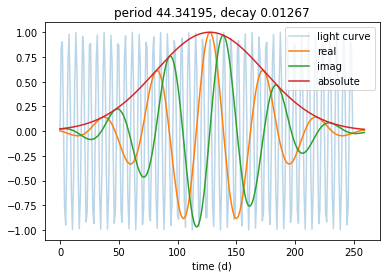

In [19]:
frequency_ind=100
dec = 1/(8*np.pi**2)
# wavelet_wwt1 = make_wavelet(frequency_ind, 0, dec=dec)
wavelet_wwt2 = make_wavelet(frequency_ind, 127, dec=dec)
wavelet_wwt = wavelet_wwt2#+wavelet_wwt2
plt.plot(x,y, alpha=0.3, label="light curve")
plt.plot(wavelet_wwt.real, label="real")
plt.plot(wavelet_wwt.imag, label="imag")
plt.plot(abs(wavelet_wwt), label="absolute")
plt.legend(loc="upper right")
plt.title("period {:.5f}, decay {:.5f}".format(1/frequency_parameters[frequency_ind],dec))

# plt.ylabel('Imaginary')
plt.xlabel('time (d)')
plt.show()

In [20]:
def make_wavelet_fred(t_freq, t_tau, dec=1/(8*np.pi**2)):
#     tau=wwt_spec[0][:,0]
    tau= np.linspace(0, 250, 260)
    domega = 2*np.pi*frequency_parameters[frequency_ind] # 400 max t_freq
    dz = domega*(-x/tau[t_tau]) #260 max t_tau
    c=dec#decay_constant
    return np.exp(1j * dz) * np.exp(-c * dz**2)
# wavelet_wwt

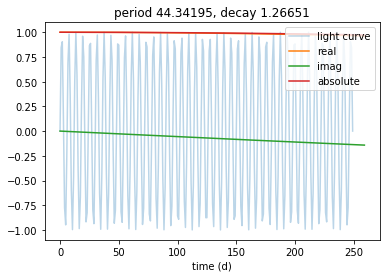

In [33]:
frequency_ind=100
dec = 1/(8*np.pi**2)*100
# wavelet_wwt1 = make_wavelet(frequency_ind, 0, dec=dec)
wavelet_wwt2 = make_wavelet_fred(frequency_ind, 250, dec=dec)
wavelet_wwt = wavelet_wwt2#+wavelet_wwt2
plt.plot(x,y, alpha=0.3, label="light curve")
plt.plot(wavelet_wwt.real, label="real")
plt.plot(wavelet_wwt.imag, label="imag")
plt.plot(abs(wavelet_wwt), label="absolute")
plt.legend(loc="upper right")
plt.title("period {:.5f}, decay {:.5f}".format(1/frequency_parameters[frequency_ind],dec))

# plt.ylabel('Imaginary')
plt.xlabel('time (d)')
plt.show()